In [1]:
import time 

from IPython.core.display import display
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
sns.set(font='Osaka')
import pandas as pd

t0 = time.time()
data_dir = '../data/'
file = 'df_sales.csv'
df_sales = pd.read_csv(data_dir + file)
print('Load in ', time.time() - t0)

Load in  0.8888921737670898


/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# UnitPrice 上位 50 レコードを確認
# NOTE: 
# StockCode が POST, DOT, M であるレコードは除外してよさそう

df_sales.sort_values('UnitPrice', ascending=False).head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
14715,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
292815,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06
169097,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75
290589,562955,DOT,DOTCOM POSTAGE,1,2011-08-11 10:14:00,4505.17,NaN,United Kingdom,4505.17
261652,560373,M,Manual,1,2011-07-18 12:30:00,4287.63,NaN,United Kingdom,4287.63
412410,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France,4161.06
412434,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536.0,France,4161.06
396804,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore,3949.32
365909,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502.0,United Kingdom,3155.95
339829,567353,M,Manual,1,2011-09-19 16:14:00,2653.95,NaN,Hong Kong,2653.95


In [8]:
# NOTE: InvoiceNo に a を含むレコードは除外してよさそう

df_sales[df_sales['InvoiceNo'].str.contains('a', case=False) == True].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
292815,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06


In [26]:
# 

df_without_A = \
df_sales[~(df_sales['InvoiceNo'].str.contains('a', case=False) == True)]\
#.sort_values('UnitPrice', ascending=False).head(50)

df_not_postage = \
df_without_A[~(df_without_A['StockCode'] == 'POST')]\
#.sort_values('UnitPrice', ascending=False).head(50)

df_not_dotcom_postage = \
df_not_postage[~(df_not_postage['StockCode'] == 'DOT')]\
#.sort_values('UnitPrice', ascending=False).head(50)

df_not_manual = \
df_not_dotcom_postage[~(df_not_dotcom_postage['StockCode'] == 'M')]\
#.sort_values('UnitPrice', ascending=False).head(50)

df_not_amazonfee = \
df_not_manual[~(df_not_manual['StockCode'] == 'AMAZONFEE')]\

In [36]:
# NOTE:
# StockCode = C2, Description = CARRIAGE, UnitPrice = 50.0 のレコードは除外すべきか？
# おそらく 除外すべきであるようにみえる。

df_not_carriage = \
df_not_amazonfee[~(df_not_amazonfee['StockCode'] == 'C2')]

In [37]:
# 商品購入を表すレコードのみから成るデータを CSV export

df_not_carriage.to_csv('../data/df_item_transaction.csv')

In [41]:
# TODO: この記述からは目的の情報は得られていない。
# 各商品で集約する必要がある。

# 商品の価格のレンジ
# NOTE:
# median = 2.08

df_not_carriage['UnitPrice'].describe()

count    527807.000000
mean          3.266809
std           4.381428
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max         649.500000
Name: UnitPrice, dtype: float64

In [42]:
df_not_carriage.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [45]:
# 各商品ごとに集約、ただし UnitPrice が異なる場合は異なる商品であるとみなす。

df_unitprice_quantity = \
pd.DataFrame(df_not_carriage.groupby(['StockCode', 'UnitPrice'])['Quantity'].sum()).reset_index()
display(df_unitprice_quantity.head())

,StockCode,UnitPrice,Quantity
0,10002,0.85,824
1,10002,1.63,9
2,10002,1.66,27
3,10080,0.39,301
4,10080,0.85,2


In [51]:
# 商品の価格のレンジ
# NOTE:
# UnitPrice median = 2.55

df_unitprice_quantity.describe()

,UnitPrice,Quantity
count,14536.000000,14536.000000
mean,4.449045,383.678522
std,9.179714,1442.302947
min,0.001000,1.000000
25%,1.250000,10.000000
50%,2.550000,46.000000
75%,5.060000,240.000000
max,649.500000,80995.000000


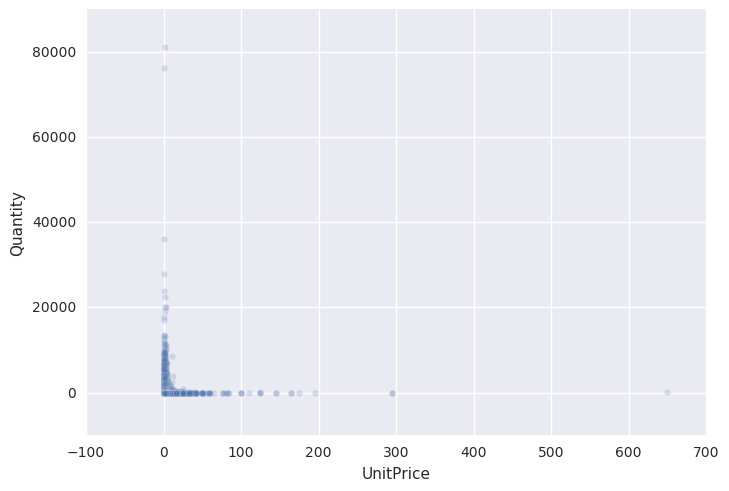

In [52]:
# UnitPrice と Quantity の関係
# UnitPrice が低い商品ほど多く購入されている気がする。

x = 'UnitPrice'
y = 'Quantity'
df_unitprice_quantity.plot(kind='scatter', x=x, y=y, alpha=0.2)
plt.show()

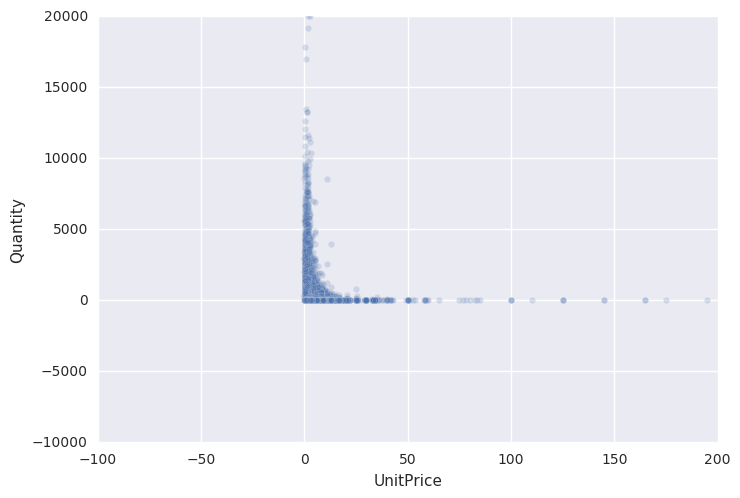

In [53]:
# UnitPrice と Quantity の関係, 範囲を限定

x = 'UnitPrice'
y = 'Quantity'
df_unitprice_quantity.plot(kind='scatter', x=x, y=y, alpha=0.2)
plt.xlim(xmax=200)
plt.ylim(ymax=20000)
plt.show()

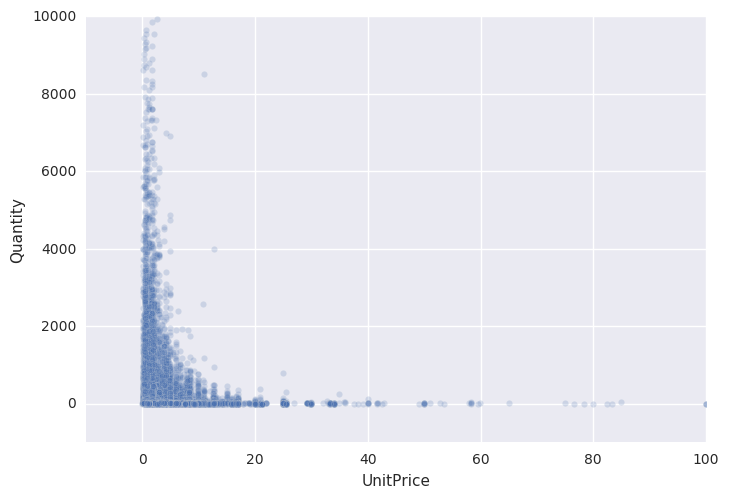

In [56]:
# UnitPrice と Quantity の関係, 範囲をさらに限定

x = 'UnitPrice'
y = 'Quantity'
df_unitprice_quantity.plot(kind='scatter', x=x, y=y, alpha=0.2)
plt.xlim(-10, 100)
plt.ylim(-1000, 10000)
plt.show()

In [61]:
# 各商品ごとに集約、各商品の売上への貢献度をみる

df_per_item = \
pd.DataFrame(df_not_carriage.groupby(['StockCode']).agg({'Quantity': np.sum, 'Sales': np.sum})).reset_index()
display(df_per_item.head())

,StockCode,Quantity,Sales
0,10002,860,759.89
1,10080,303,119.09
2,10120,193,40.53
3,10123C,5,3.25
4,10124A,16,6.72


In [75]:
# 商品ごとの売上への貢献度をみる

df_per_item['Sales%'] = \
(df_per_item['Sales'] / df_per_item['Sales'].sum()) * 100
df_per_item.sort_values('Sales').tail()

,StockCode,Quantity,Sales,Sales%
3387,85099B,48474,94340.05,0.918388
2670,47566,18295,99504.33,0.968662
3407,85123A,37660,104518.80,1.017477
2465,23843,80995,168469.60,1.640030
1310,22423,13879,174484.74,1.698586


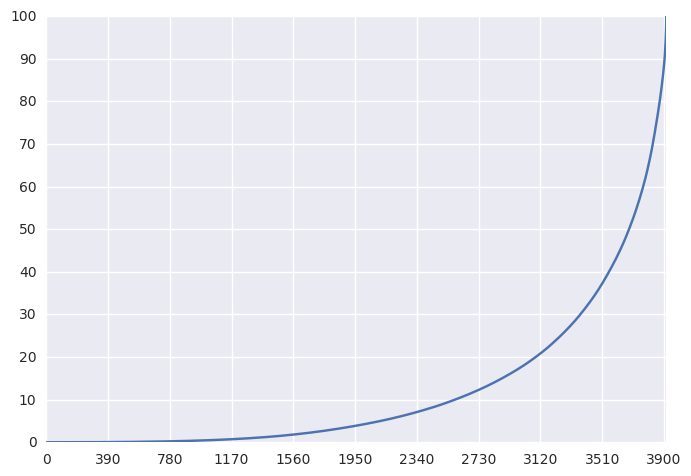

In [93]:
# NOTE:
# 売上上位　10% の商品で 60% の売上が生み出されている。
# これは、売上の大きい商品が売上に占める割合は大きいので当然だった。


np.cumsum(df_per_item.sort_values('Sales%')['Sales%']).reset_index()['Sales%'].plot()
plt.xticks(np.arange(0, 3917, 390))
plt.yticks(np.arange(0, 101, 10))
plt.ylim(0, 100)
plt.show()